In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
teams = pd.read_csv('./baseballdatabank-master/core/Teams.csv')

In [3]:
teams = teams[teams['yearID'] >= 1982]
teams = teams[['yearID', 'teamID', 'Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]

In [4]:
teams = teams.set_index(['yearID', 'teamID'])

In [5]:
teams['W'][2011, 'SLN']


90

In [6]:
print(teams)

               Rank    R   RA    G    W     H     BB   HBP    AB    SF   HR  \
yearID teamID                                                                 
1982   ATL        1  739  702  162   89  1411  554.0  29.0  5507  43.0  146   
       BAL        2  774  687  163   94  1478  634.0  25.0  5557  52.0  179   
       BOS        3  753  713  162   89  1536  547.0  28.0  5596  38.0  136   
       CAL        1  814  670  162   93  1518  613.0  35.0  5532  56.0  186   
       CHA        3  786  710  162   87  1523  533.0  30.0  5575  50.0  136   
       CHN        5  676  709  162   73  1436  460.0  25.0  5531  49.0  102   
       CIN        6  545  661  162   61  1375  470.0  21.0  5479  41.0   82   
       CLE        6  683  748  162   78  1458  651.0  35.0  5559  40.0  109   
       DET        4  729  685  162   83  1489  470.0  26.0  5590  39.0  177   
       HOU        5  569  620  162   77  1342  435.0  19.0  5440  46.0   74   
       KCA        2  784  717  162   90  1603  442.0

In [7]:
teams.xs(2013)

,Rank,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B
teamID,,,,,,,,,,,,,
ARI,2,685,695,162,81,1468,519.0,43.0,5676,43.0,130,302,31
ATL,1,688,548,162,96,1354,542.0,55.0,5441,35.0,181,247,21
BAL,3,745,709,162,85,1460,416.0,36.0,5620,45.0,212,298,14
BOS,1,853,656,162,97,1566,581.0,72.0,5651,50.0,178,363,29
CHA,5,598,723,162,63,1385,411.0,34.0,5563,48.0,148,237,19
CHN,5,602,689,162,66,1307,439.0,67.0,5498,30.0,172,297,18
CIN,3,698,589,162,90,1370,585.0,76.0,5499,46.0,155,274,20
CLE,2,745,662,162,92,1391,562.0,51.0,5465,56.0,171,290,23
COL,5,706,760,162,74,1511,427.0,26.0,5599,35.0,159,283,36


In [8]:
salaries = pd.read_csv('./baseballdatabank-master/core/Salaries.csv')

In [9]:
print(salaries)

       yearID teamID lgID   playerID    salary
0        1985    ATL   NL  barkele01    870000
1        1985    ATL   NL  bedrost01    550000
2        1985    ATL   NL  benedbr01    545000
3        1985    ATL   NL   campri01    633333
4        1985    ATL   NL  ceronri01    625000
5        1985    ATL   NL  chambch01    800000
6        1985    ATL   NL  dedmoje01    150000
7        1985    ATL   NL  forstte01    483333
8        1985    ATL   NL  garbege01    772000
9        1985    ATL   NL  harpete01    250000
10       1985    ATL   NL  hornebo01   1500000
11       1985    ATL   NL  hubbagl01    455000
12       1985    ATL   NL  mahleri01    407500
13       1985    ATL   NL  mcmurcr01    275000
14       1985    ATL   NL  mumphje01    775000
15       1985    ATL   NL  murphda05   1625000
16       1985    ATL   NL  oberkke01    616667
17       1985    ATL   NL  perezpa01    450000
18       1985    ATL   NL  perryge01    120000
19       1985    ATL   NL  ramirra01    750000
20       1985

In [10]:
salaries_by_yearID_teamID = salaries.groupby(['yearID', 'teamID'])['salary'].sum()

In [11]:
salaries_by_yearID_teamID[2006, 'SLN']

88891371

In [12]:
teams = teams.join(salaries_by_yearID_teamID)

In [13]:
teams.xs(2013)

,Rank,R,RA,G,W,H,BB,HBP,AB,SF,HR,2B,3B,salary
teamID,,,,,,,,,,,,,,
ARI,2,685,695,162,81,1468,519.0,43.0,5676,43.0,130,302,31,90132000.0
ATL,1,688,548,162,96,1354,542.0,55.0,5441,35.0,181,247,21,87871525.0
BAL,3,745,709,162,85,1460,416.0,36.0,5620,45.0,212,298,14,84393333.0
BOS,1,853,656,162,97,1566,581.0,72.0,5651,50.0,178,363,29,151530000.0
CHA,5,598,723,162,63,1385,411.0,34.0,5563,48.0,148,237,19,120065277.0
CHN,5,602,689,162,66,1307,439.0,67.0,5498,30.0,172,297,18,100567726.0
CIN,3,698,589,162,90,1370,585.0,76.0,5499,46.0,155,274,20,106404462.0
CLE,2,745,662,162,92,1391,562.0,51.0,5465,56.0,171,290,23,75771800.0
COL,5,706,760,162,74,1511,427.0,26.0,5599,35.0,159,283,36,74409071.0


Text(0,0.5,'Salary')

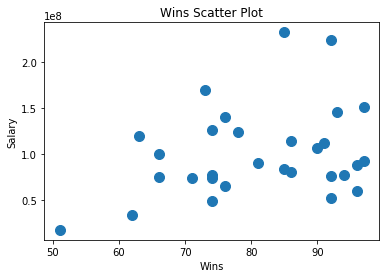

In [14]:
plt.scatter(teams['W'][2013], teams['salary'][2013], s=100)
plt.title('Wins Scatter Plot')
plt.xlabel('Wins')
plt.ylabel('Salary')

In [15]:
def plot_spending_wins(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'OAK':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#27AE60", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#27AE60"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'NYA':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#2874A6", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#2874A6"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'SLN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#FF6666", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))     
        else:
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="grey", s=200)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel('Salaries', fontsize=20)
    ax.set_ylabel('Number of Wins' , fontsize=20)

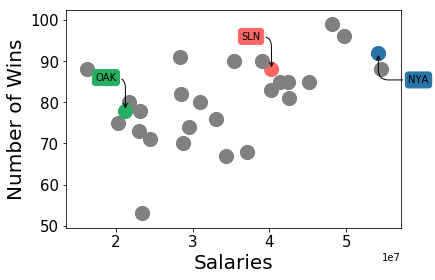

In [37]:
plot_spending_wins(teams, 1996)


In [23]:
teams['BA'] = teams['H']/teams['AB']

In [24]:
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm


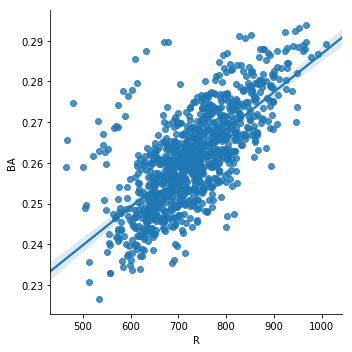

In [25]:
sns.lmplot(x='R',y='BA', data=teams, fit_reg=True)

The correlation between average BA Runs Scored is 0.704
The correlation between average H Runs Scored is 0.788
The correlation between average HR Runs Scored is 0.714


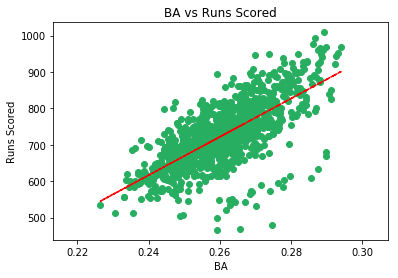

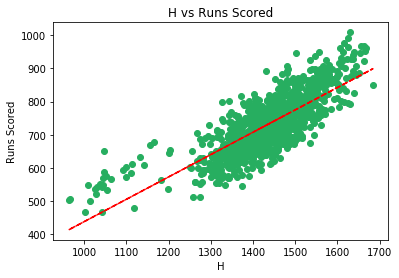

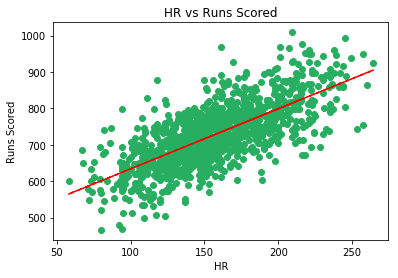

In [26]:
def analyze(record_df, statistics_list):
    for statistic in statistics_list:
        x = record_df[statistic]
        y = record_df['R']  
        plt.figure()
        plt.scatter(x,y,color="#27AE60")
        plt.title('{} vs Runs Scored'.format(statistic))
        plt.ylabel('Runs Scored')
        plt.xlabel('{}'.format(statistic))
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), 'r--')
        print('The correlation between average {} Runs Scored is {:0.3f}' \
         .format(statistic, record_df.corr()[statistic]['R']))
analyze(teams, ['BA', 'H', 'HR'])

In [27]:

teams['OBP'] = (teams['H'] + teams['BB'] + teams['HBP']) / (teams['AB'] + teams['BB'] + teams['HBP'] + teams['SF'])
teams['SLG'] = (teams['H'] + teams['2B'] + (2*teams['3B']) + (3*teams['HR'])) / teams['AB']

The correlation between average OBP Runs Scored is 0.785
The correlation between average SLG Runs Scored is 0.812


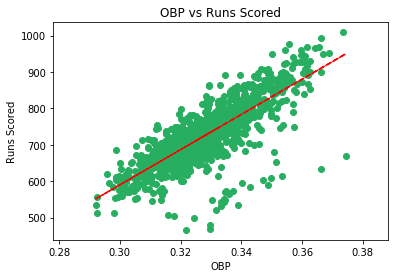

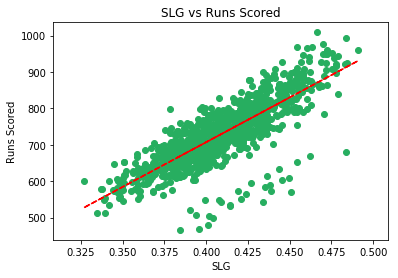

In [28]:
analyze(teams, ['OBP', 'SLG'])

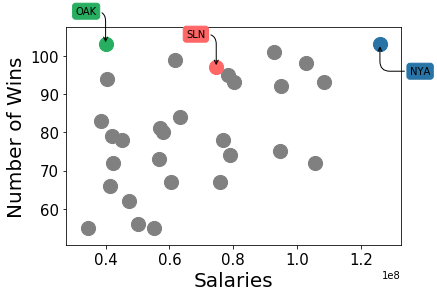

In [32]:
plot_spending_wins(teams, 2002)

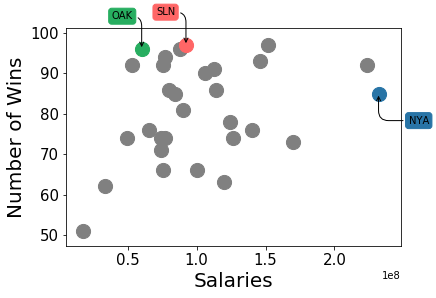

In [33]:
plot_spending_wins(teams, 2013)

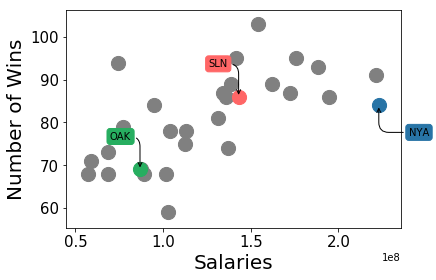

In [35]:
plot_spending_wins(teams, 2016)

In [41]:
def plot_spending_wins2(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'PIT':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#F4D03F", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#F4D03F"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'NYA':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#2874A6", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#2874A6"),
                        xytext=(30, -30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'LAN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#5DADE2", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#5DADE2"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))     
        else:
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="grey", s=200)

    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel('Salaries', fontsize=20)
    ax.set_ylabel('Number of Wins' , fontsize=20)

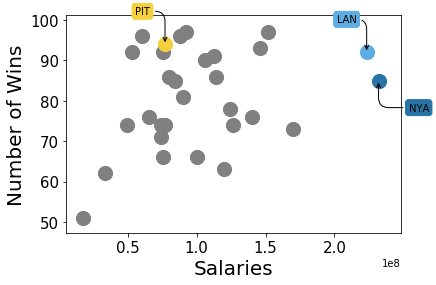

In [50]:
plot_spending_wins2(teams, 2013)

Text(0.5,1,'Distribution of Wins')

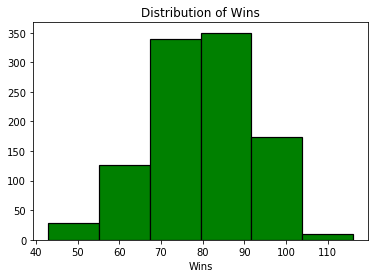

In [38]:
plt.hist(teams['W'], bins=6, color='g', edgecolor='black', linewidth=1.2, align='mid')
plt.xlabel('Wins')
plt.title('Distribution of Wins')


In [ ]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in teams.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        


In [ ]:
# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games

In [ ]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')
